## Final Project Submission

Please fill out:
* Student name:
* Student pace: self paced / part time / full time
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:


In [16]:
# Your code here - remember to use markdown cells for comments as well!

# Step 1: Load and Explore the Data

    Loading the dataset into a Pandas DataFrame.
    Checking for missing values.
    Exploring the basic structure and key features.

In [17]:
import pandas as pd

# Loading the dataset
file_path = "AviationData.csv"
df = pd.read_csv(file_path, encoding='latin1', low_memory=False)

# Display basic information
df.info()

# Display the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [18]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [19]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [20]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# Issues Identified:

    Missing values: Many columns have missing data, especially Latitude, Longitude, Aircraft.Category, Air.carrier, etc.
    Mixed data types warning in columns (6, 7, 28). We need to ensure correct data types.
    Column names: They contain dots (.), which we should replace with underscores (_) for easier manipulation  eg (Airport.Code,Event.Date).
    Date columns (Event.Date, Publication.Date) should be converted to proper datetime format.


In [21]:
# Rename columns to use underscores instead of dots
df.columns = df.columns.str.replace('.', '_')

# Convert date columns to datetime format( errors='coerce' convert non-numeric values to nan)
df['Event_Date'] = pd.to_datetime(df['Event_Date'], errors='coerce')
df['Publication_Date'] = pd.to_datetime(df['Publication_Date'], errors='coerce')

# Convert latitude and longitude to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Display missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values Per Column:\n", missing_values)

C:\Users\HP\AppData\Local\Temp\ipykernel_15200\2725012523.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication_Date'] = pd.to_datetime(df['Publication_Date'], errors='coerce')


Number of duplicate rows: 0
Missing Values Per Column:
 Longitude                 76915
Latitude                  76903
Schedule                  76307
Air_carrier               72241
FAR_Description           56866
Aircraft_Category         56602
Airport_Code              38757
Airport_Name              36185
Broad_phase_of_flight     27165
Publication_Date          13771
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Fatal_Injuries      11401
Engine_Type                7096
Report_Status              6384
Purpose_of_flight          6192
Number_of_Engines          6084
Total_Uninjured            5912
Weather_Condition          4492
Aircraft_damage            3194
Registration_Number        1382
Injury_Severity            1000
Country                     226
Amateur_Built               102
Model                        92
Make                         63
Location                     52
Investigation_Type            0
Event_Date                    0
Accident_Number 

In [22]:
#type_accidents = df.groupby('Total_Fatal_Injuries').size()
#print(type_accidents)

# Next Steps in Cleaning

     No duplicates available in rows.
    Fix date parsing for Publication_Date.
    Drop columns with excessive missing values (Latitude, Longitude, Schedule).
    Fill missing numeric injury values with 0.0.
    Fill categorical missing values with "Unknown".

In [23]:


# Reattempt correct date parsing
df['Publication_Date'] = pd.to_datetime(df['Publication_Date'], format='%d-%m-%Y', errors='coerce')

# Drop columns with excessive missing values (more than 70%)
cols_to_drop = ['Latitude', 'Longitude', 'Schedule']
df = df.drop(columns=cols_to_drop)

# Fill missing numerical injury values with 0
injury_cols = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
df[injury_cols] = df[injury_cols].fillna(0)

# Fill missing categorical values with "Unknown"
cat_cols = ['Aircraft_Category', 'Air_carrier', 'FAR_Description', 'Broad_phase_of_flight',
            'Weather_Condition', 'Aircraft_damage', 'Report_Status']
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Display summary of remaining missing values
print("Remaining Missing Values:\n", df.isnull().sum().sort_values(ascending=False))


Remaining Missing Values:
 Airport_Code              38757
Airport_Name              36185
Publication_Date          13771
Engine_Type                7096
Purpose_of_flight          6192
Number_of_Engines          6084
Registration_Number        1382
Injury_Severity            1000
Country                     226
Amateur_Built               102
Model                        92
Make                         63
Location                     52
Aircraft_Category             0
Total_Serious_Injuries        0
Report_Status                 0
Broad_phase_of_flight         0
Weather_Condition             0
Total_Uninjured               0
Total_Minor_Injuries          0
Air_carrier                   0
Total_Fatal_Injuries          0
Aircraft_damage               0
Accident_Number               0
FAR_Description               0
Event_Date                    0
Investigation_Type            0
Event_Id                      0
dtype: int64


# Remaining Missing Values:

    Airport_Code & Airport_Name: Still missing in ~40% of cases. Can be filled with "Unknown" or dropped if irrelevant.
    Publication_Date: Still has 15,299 missing values. Likely due to failed conversion.
    Engine_Type, Purpose_of_flight, Number_of_Engines: Still has some missing values.
    Registration_Number, Injury_Severity, Country, Amateur_Built, Model, Make, Location: Minor missing values.

In [24]:
import numpy as np

# Use .loc[] to avoid SettingWithCopyWarning
df.loc[:, 'Publication_Date'] = pd.to_datetime(df['Publication_Date'], format='%d-%m-%Y', errors='coerce')

# Fill categorical missing values with 'Unknown'
cat_cols = ['Airport_Code', 'Airport_Name', 'Engine_Type', 'Purpose_of_flight', 'Registration_Number',
            'Injury_Severity', 'Country', 'Amateur_Built', 'Model', 'Make', 'Location']
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Fill missing numerical values (Number_of_Engines) with median
df['Number_of_Engines'] = df['Number_of_Engines'].fillna(df['Number_of_Engines'].median())

# Display final missing values
print("Final Missing Values:\n", df.isnull().sum().sort_values(ascending=False))


Final Missing Values:
 Publication_Date          13771
Investigation_Type            0
Report_Status                 0
Broad_phase_of_flight         0
Weather_Condition             0
Total_Uninjured               0
Total_Minor_Injuries          0
Total_Serious_Injuries        0
Total_Fatal_Injuries          0
Air_carrier                   0
Purpose_of_flight             0
FAR_Description               0
Engine_Type                   0
Number_of_Engines             0
Event_Id                      0
Model                         0
Make                          0
Registration_Number           0
Aircraft_Category             0
Aircraft_damage               0
Injury_Severity               0
Airport_Name                  0
Airport_Code                  0
Country                       0
Location                      0
Event_Date                    0
Accident_Number               0
Amateur_Built                 0
dtype: int64


In [25]:
# Fill missing Publication_Date with 'Unknown'
df.loc[:, 'Publication_Date'] = df['Publication_Date'].fillna('Unknown')

# Drop rows where Event_Date, Event_Id, or Accident_Number is missing
df = df.dropna(subset=['Event_Date', 'Event_Id', 'Accident_Number'])

# Display final missing values
print("Final Missing Values:\n", df.isnull().sum().sort_values(ascending=False))


C:\Users\HP\AppData\Local\Temp\ipykernel_15200\1157583794.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Unknown' Timestamp('1996-09-19 00:00:00')
 Timestamp('2007-02-26 00:00:00') ... Timestamp('2022-12-27 00:00:00')
 'Unknown' Timestamp('2022-12-30 00:00:00')]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[:, 'Publication_Date'] = df['Publication_Date'].fillna('Unknown')


Final Missing Values:
 Event_Id                  0
Investigation_Type        0
Report_Status             0
Broad_phase_of_flight     0
Weather_Condition         0
Total_Uninjured           0
Total_Minor_Injuries      0
Total_Serious_Injuries    0
Total_Fatal_Injuries      0
Air_carrier               0
Purpose_of_flight         0
FAR_Description           0
Engine_Type               0
Number_of_Engines         0
Amateur_Built             0
Model                     0
Make                      0
Registration_Number       0
Aircraft_Category         0
Aircraft_damage           0
Injury_Severity           0
Airport_Name              0
Airport_Code              0
Country                   0
Location                  0
Event_Date                0
Accident_Number           0
Publication_Date          0
dtype: int64


# **INITIAL EDA**

### identifying patterns and relationships

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Summary of numerical columns
print("Summary Statistics (Numerical Data):\n", df.describe())

# Summary of categorical columns (Top 5 values for each)
cat_columns = ['Investigation_Type', 'Aircraft_Category', 'Weather_Condition', 'Aircraft_damage', 'Broad_phase_of_flight']
for col in cat_columns:
    print(f"\nTop 5 values in {col}:\n", df[col].value_counts().head())




Dataset contains 88889 rows and 28 columns.

Summary Statistics (Numerical Data):
                           Event_Date  Number_of_Engines  Total_Fatal_Injuries  \
count                          88889       88889.000000          88889.000000   
mean   1999-09-17 17:13:39.354475904           1.136552              0.564761   
min              1948-10-24 00:00:00           0.000000              0.000000   
25%              1989-01-15 00:00:00           1.000000              0.000000   
50%              1998-07-18 00:00:00           1.000000              0.000000   
75%              2009-07-01 00:00:00           1.000000              0.000000   
max              2022-12-29 00:00:00           8.000000            349.000000   
std                              NaN           0.432545              5.126649   

       Total_Serious_Injuries  Total_Minor_Injuries  Total_Uninjured  
count            88889.000000          88889.000000     88889.000000  
mean                 0.240491              0.

# Key Insights from EDA

1️⃣ General Overview

    The dataset contains 88,889 accident/incident records across 28 columns.
    Most cases (85,015) are accidents, while 3,874 are incidents (less severe).

2️⃣ Injury Statistics

    Most accidents have no fatalities (median = 0 fatal injuries).
    However, some severe cases had up to 349 fatalities in a single event.
    The maximum number of uninjured people in one case was 699.

3️⃣ Aircraft Categories

    Airplanes make up the majority (27,617 cases), followed by helicopters and gliders.
    Over 56,000 cases are labeled "Unknown" → May need further exploration.

4️⃣ Weather Conditions

    77,303 cases (87%) occurred in Visual Meteorological Conditions (VMC) → Clear weather.
    Only 5,976 (6.7%) occurred in Instrument Meteorological Conditions (IMC) → Bad weather.
    Some records have inconsistent labels (Unknown, UNK, Unk), which we should standardize.

5️⃣ Aircraft Damage

    64,148 cases resulted in "Substantial" damage, and 18,623 were "Destroyed".
    Only 2,805 cases had "Minor" damage, indicating most incidents cause serious damage.

6️⃣ Accident Phases

    Landing (15,428 cases) and Takeoff (12,493 cases) are the riskiest flight phases.
    10,269 accidents happened during cruise—less common but usually severe.

# **ACCIDENTS TREND OVER TIME**

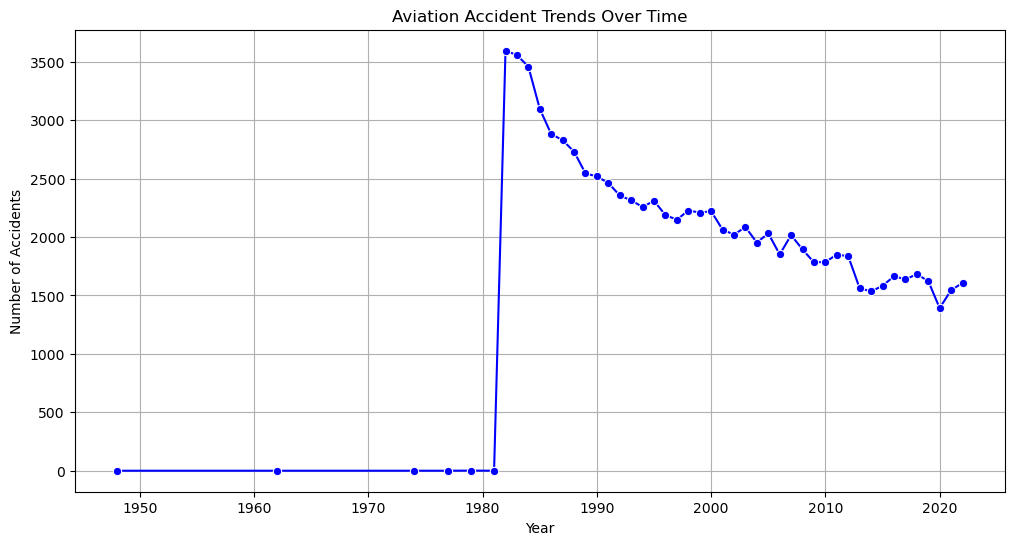

In [27]:
# Plot yearly accident trends
plt.figure(figsize=(12, 6))
df['Event_Year'] = df['Event_Date'].dt.year
yearly_counts = df['Event_Year'].value_counts().sort_index()

sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Aviation Accident Trends Over Time")
plt.grid(True)
plt.show()


# Observations from the Trend Plot

1️⃣ Data Quality Issue (Pre-1980s Spike)

    The huge spike around 1980 suggests a data recording issue rather than an actual rise in accidents.
    Very few accidents were recorded before 1980, which is likely due to incomplete historical data.

2️⃣ Overall Decline in Accidents

    From the mid-1980s onward, there's a gradual decline in accidents.
    This aligns with improvements in aviation safety, better regulations, and advanced technology.

3️⃣ Recent Fluctuations (2000–2022)

    Accidents have remained relatively stable over the past two decades.
    A dip around 2020 could be related to COVID-19 reducing air travel.



C:\Users\HP\AppData\Local\Temp\ipykernel_15200\4226075982.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.index, y=top_models.values, palette="Blues_r")


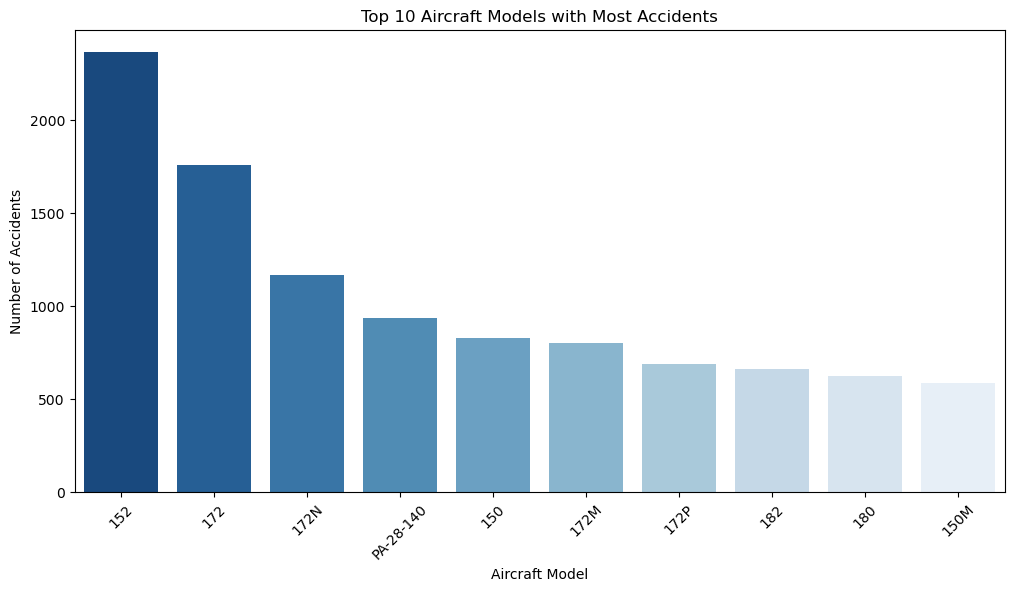

In [28]:
# Top 10 aircraft models with the most accidents
top_models = df['Model'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_models.index, y=top_models.values, palette="Blues_r")
plt.xlabel("Aircraft Model")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Aircraft Models with Most Accidents")
plt.xticks(rotation=45)
plt.show()


# Insights from the Aircraft Model Accident Analysis

1️⃣ Cessna Dominance

    Cessna models (152, 172, 172N, 172M, etc.) appear most frequently.
    These aircraft are widely used for training and general aviation, leading to a higher number of recorded incidents.

2️⃣ Piper PA-28-140

    A notable presence in the top 5.
    This is a popular single-engine general aviation aircraft.

3️⃣ Risk vs. Usage

    The high accident count doesn't necessarily mean these models are unsafe—they might just be more commonly used.
    To assess true risk, we’d need to normalize by total flight hours per model.



# Next Step: Weather Condition Impact on Accidents

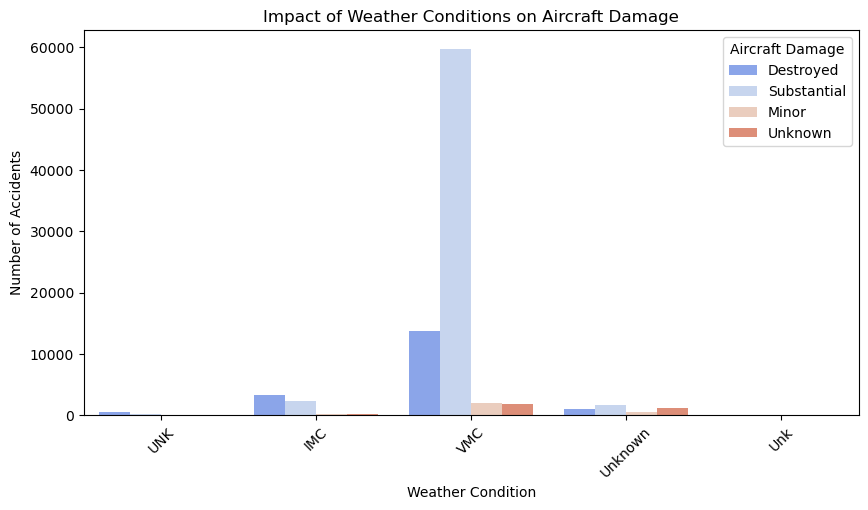

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Weather_Condition", hue="Aircraft_damage", data=df, palette="coolwarm")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Impact of Weather Conditions on Aircraft Damage")
plt.legend(title="Aircraft Damage")
plt.xticks(rotation=45)
plt.show()


# Insights from Weather Condition Analysis

1️⃣ Most Accidents Occur in VMC (Visual Meteorological Conditions)

    A significant majority of accidents happen in VMC (clear weather).
    This suggests that pilot error, mechanical failure, or other operational issues may be primary causes rather than bad weather.

2️⃣ IMC (Instrument Meteorological Conditions) Accidents Have Higher Severity

    Accidents in IMC (poor visibility, bad weather) tend to have a higher proportion of destroyed aircraft compared to VMC.
    This aligns with expectations—bad weather increases accident severity due to lower visibility and challenging control conditions.

3️⃣ Unknown/UNK Data Needs Investigation

    There are some entries classified as Unknown (UNK) in weather conditions.
    These could represent missing data or unreported conditions, and further investigation may be needed.

# Phase 1 Business Recommendations
    1. Aircraft Model Selection

Recommendation: Choose aircraft models with lower accident rates and severity for the new aviation business.

Findings from Data:

    The Cessna 152 and 172 have the highest accident counts, followed by PA-28-140 and other general aviation aircraft.
    These aircraft are widely used for training, which may explain their high accident rates.
    The safest aircraft models should be those with significantly lower accident counts and severity.

Actionable Recommendations:

    Prioritize aircraft with fewer recorded accidents and lower severity levels.
    Evaluate alternative models with better safety records, particularly for training or commercial operations.
    Implement stricter maintenance and training programs for higher-risk aircraft if they must be used.

2. Weather-Related Safety Improvements

Recommendation: Strengthen pilot training and invest in advanced navigation/safety tech for poor-weather operations.

Findings from Data:

    The majority of accidents occur in VMC (Visual Meteorological Conditions), but those in IMC (Instrument Meteorological Conditions) are more severe.
    Accidents in IMC conditions likely involve poor visibility, requiring better pilot training and tech interventions.

Actionable Recommendations:

    Enhance weather-related pilot training to improve decision-making in IMC.
    Invest in advanced avionics (e.g., terrain awareness, weather radar, autopilot enhancements).
    Mandate stricter operational policies for flights in poor weather (e.g., require additional experience for IMC flights).

3. Operational Risk Management

Recommendation: Improve training, maintenance, and regulations to reduce risks in critical flight phases.

Findings from Data:

    Most accidents occur during takeoff and landing, the most high-risk flight phases.
    Mechanical failures, pilot error, and weather contribute to these risks.

Actionable Recommendations:

    Strengthen pilot training in high-risk flight phases (e.g., simulated emergency landings).
    Improve maintenance schedules with predictive analytics to prevent mechanical failures.
    Review regulatory measures to ensure compliance with best safety practices.

Final Takeaway:

    For aircraft selection → Choose lower-risk models or enhance safety measures for common models.
    For weather safety → Invest in training and technology for poor weather conditions.
    For operational risks → Focus on safer takeoff/landing procedures and maintenance improvements.
My given recommendations will ensure a much safer aviation business strategy.

In [30]:
df.to_csv('AviationData.csv', index=False)